#  HW 3 Worked Problems

<div id="author">
Chase Carlson<br>
GSCM 575 - Machine Learning for Business<br>
The School of Business<br>
Portland State University<br>
</div>

In [2]:
from datetime import datetime as dt
now = dt.now()
print("Analysis on ", now.strftime("%Y-%m-%d"), "at ", now.strftime("%H:%M %p"))

Analysis on  2023-07-12 at  16:26 PM


In [3]:
import os
os.getcwd()

'/Users/chasecarlson/Documents/GSCM Course Materials/GSCM 575 Machine Learning in Business/Python Pjojects/GSCM-575-ML/code'

<h1><span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Summary" data-toc-modified-id="Data-Summary-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Summary</a></span></li><li><span><a href="#Regression-Analysis" data-toc-modified-id="Regression-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Regression Analysis</a></span></li></ul></div>

The data for both problems in this homework are real body measurements of customers for a motorcycle online clothing retailer (for which I consulted and gained permission to use the anonymized data for non-commercial purposes).

Data: http://web.pdx.edu/~gerbing/data/BodyMeas.csv


### Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import Dataset

In [32]:
df = pd.read_csv("http://web.pdx.edu/~gerbing/data/BodyMeas.csv")
df.head()

,Gender,Weight,Height,Waist,Hips,Chest,Hand,Shoe
0,F,200,71,43,46,45,8.5,7.5
1,F,155,66,31,43,37,8.0,8.0
2,F,145,64,35,40,40,7.5,7.5
3,F,140,66,31,40,36,8.0,9.0
4,M,230,76,40,43,44,9.0,12.0


## 1. Data Summary

*a.	How many samples (rows of data) and columns are there in the data file?*

In [33]:
df.shape

(340, 8)

There are 340 rows and 8 columns in this data file.

*b.	Display the first 6 rows of data and the variable names.*

In [34]:
df.head(6)

,Gender,Weight,Height,Waist,Hips,Chest,Hand,Shoe
0,F,200,71,43,46,45,8.5,7.5
1,F,155,66,31,43,37,8.0,8.0
2,F,145,64,35,40,40,7.5,7.5
3,F,140,66,31,40,36,8.0,9.0
4,M,230,76,40,43,44,9.0,12.0
5,F,120,67,32,39,36,7.0,8.0


*c.	What are the variables in the data table?  (Can copy and paste.)*

The variables names are: "Gender", "Weight", "Height", "Waist", "Hips", "Chest", "Hand", and "Shoe"

*d.	Generate a frequency distribution table of Gender.*

Use value_counts to see how Gender is distributed. There are 170 Males and 170 Females in this data set.

In [35]:
df.Gender.value_counts()

F    170
M    170
Name: Gender, dtype: int64

*e.	Generate a bar chart of Gender.*

<Axes: xlabel='Gender', ylabel='count'>

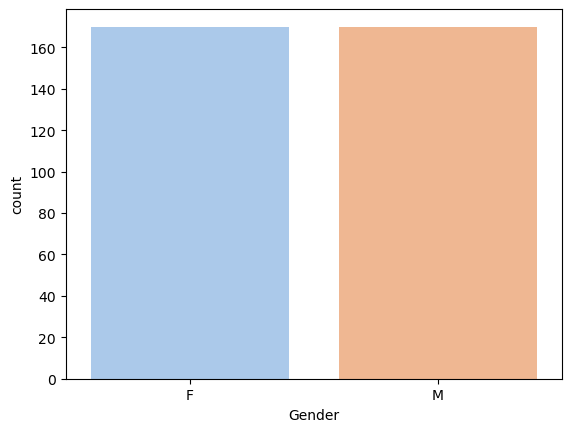

In [36]:
sns.countplot(df, x = "Gender", palette="pastel")

*f.	As with the posted online material, for this week we analyze only the Male customers so we can first practice with a simpler, one-predictor model. Filter the data table to contain only customers with a Male body type. Display the first 6 rows of data and the number of rows.*

Use query() function to filter rows that only contain Male customers.

In [37]:
df2 = df.query("Gender == 'M'")
df2.head(6)

,Gender,Weight,Height,Waist,Hips,Chest,Hand,Shoe
4,M,230,76,40,43,44,9.0,12.0
6,M,187,71,39,42,41,8.0,10.0
7,M,145,67,32,36,38,8.5,8.0
8,M,145,70,35,38,38,9.0,11.0
11,M,173,68,38,41,42,9.0,9.0
12,M,165,71,39,40,40,9.0,9.5


*g.	Generate a boxplot of Weight.*

Use boxplot() from seaborn package to create boxplot of male customers.

<Axes: xlabel='Weight'>

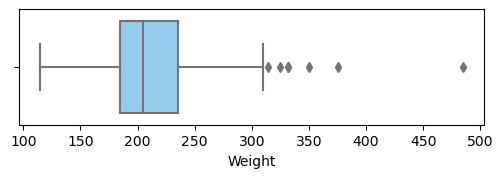

In [38]:
plt.figure(figsize=(6,1.5))
sns.boxplot(df2, x = "Weight", color="lightskyblue")

*h.	Generate the scatterplot of Weight and Chest size.*

Use relplot() function from seaborn package to create scatterplot of Weight and Chest size.

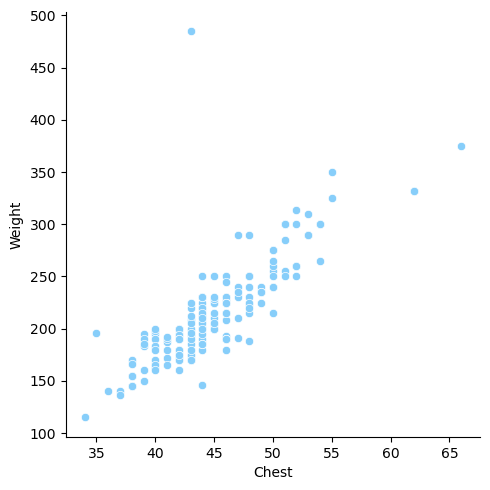

In [39]:
sns.relplot(df2, x = 'Chest', y = 'Weight', color='lightskyblue')

*i.	There are outliers in the data. Either the data values are mis-entered, or, if correct, any generalizations would not properly apply to this person. Subset the data frame to remove the corresponding rows of data and display the number of rows in the filtered data frame to demonstrate the deletion.*

*There is no correct number of outliers to delete, but we wish to delete as few as possible. Use the information from the boxplot and the scatterplot to provide justification for the number of outliers to delete.*

Reference the current shape of df2 before removing outlier

In [40]:
df2.shape

(170, 8)

We have at least one data point with a weight value near 500 lbs that appears to be an outlier. Since there is only one value that does not appear to follow the same linear path as the rest, I will use query() to filter out all values >450. The other data points with high weight values follow a reasonable linear path to retain in the dataset.

In [42]:
df2 = df2.query('Weight < 450')
df2.shape

(169, 8)

*j.	Generate a histogram of Weight.*

<Axes: xlabel='Weight', ylabel='Count'>

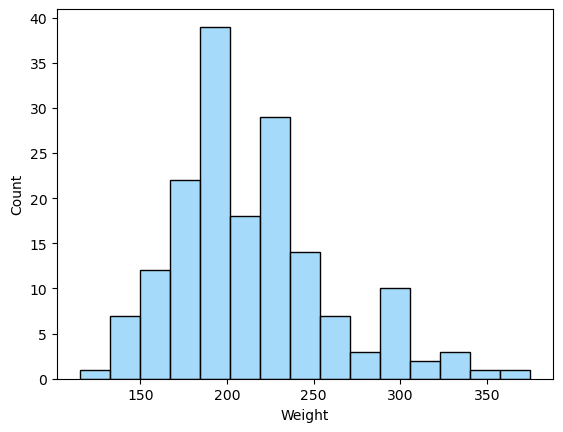

In [45]:
sns.histplot(df2, x = 'Weight', color='lightskyblue')

*k.	Generate a histogram of Weight with 30 bins. Compare to the default histogram. Which is preferred?*

<Axes: xlabel='Weight', ylabel='Count'>

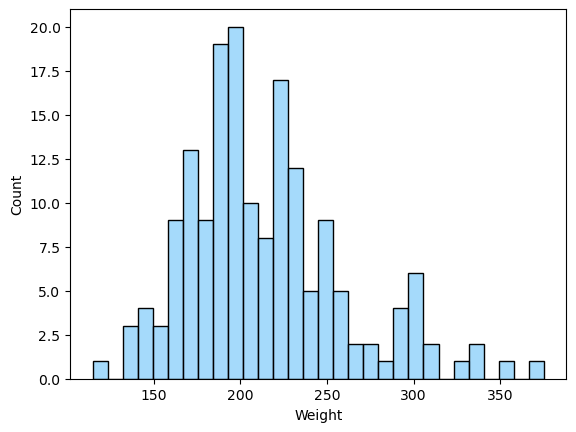

In [46]:
sns.histplot(df2, x = 'Weight', bins=30, color='lightskyblue')

In this case the default histogram appears to provide a better representation of the data because it presents a more meaningful summary. The plot with 30 bins is too granular. There are too many missing columns and columns with single data points that could be grouped together with a wider bin range to provide a more meaningful visualization.

*l.	Generate a histogram of Weight with an overlay of a density plot.*

Instead of histplot(), I will use displot() to overlay a kernel density estimate (kde) by setting kde=True.

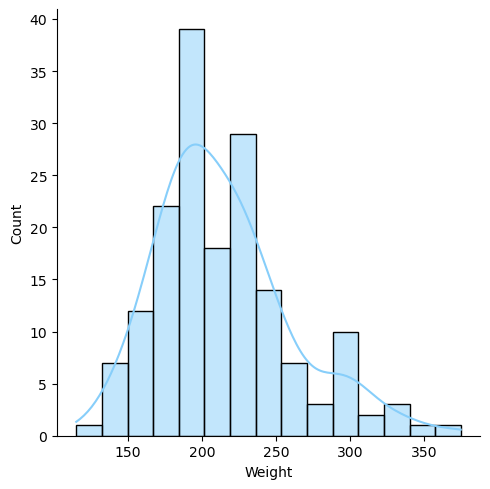

In [49]:
sns.displot(df2, x = 'Weight', color='lightskyblue', kde=True)

## 2. Regression Analysis 

*a.	Run the regression analysis of using Chest size to forecast Weight.*

First isolate the predictor and target variables where X is the predictor variable and y is the target variable.

In [ ]:
X = df['Chest']
y = df['Weight']

Next, add a constant to the X data structure so that the estimated model will have a non-zero y-intercept.

In [56]:
import statsmodels.api as sm
from statsmodels.regression.linear_model import RegressionResults
X = sm.add_constant(X)
X.head()

,const,Chest
0,1.0,45
1,1.0,37
2,1.0,40
3,1.0,36
4,1.0,44


Specify the model with OLS() function from statsmodel. OLS = ordinary least squares, the default estimation procedure for linear regression models.

In [58]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     970.8
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          2.16e-101
Time:                        21:00:13   Log-Likelihood:                -1600.8
No. Observations:                 340   AIC:                             3206.
Df Residuals:                     338   BIC:                             3213.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -168.0243     11.331    -14.829      0.0

*b.	Write the regression model.*

The y-intercept (b0) for this model is -168.0243, and the slope coefficient (b1) is 8.3424. The regression equation for this model would be written as: y = -168.0243 + 8.3424(x). 

*c.	For a Chest size of 42 inches, what is the forecasted Weight.*

To predict the weight of a person with a chest size of 42 inches, we can fit the value into the model. I am going to round to the nearest hundredth of a pound:

In [70]:
print("The predicted weight for a person with a chest size of 42 inches is: ", round(-168.0243 + 8.3424*42, 2), "lbs")

The predicted weight for a person with a chest size of 42 inches is:  182.36 lbs


*d.	What is the residual for a person with a chest size of 62 inches and weighs 165 lbs?*

Residual equation: e = y - y_predicted.

In [78]:
y_predicted = (-168.0243 + 8.3424*62)
print("e = ", round(165 - y_predicted, 2))


e =  -184.2


The residual for a person with a chest size of 62 inches and weighs 165 lbs is -184.2 lbs.

*e.	Does the hypothesis test indicate a relationship between Chest size and Weight?*

The hypothesis test does seem to indicate a relationship between chest size and weight. Based on a p-value < 0.05, it is highly unlikely to get a slope coefficient of 8.3424 if there were no relationship between the variables. 

*f.	What is the best estimate of the population slope coefficient?*

The best estimate of the population slope coefficient lies within the confidence interval. The middle of that range in this analysis is 8.3424. The standard confidence interval is 95%, but can be adjusted.

*g.	Interpret the confidence interval of the population slope coefficient. (Interpretation means to apply the meaning of the result to this specific analysis, not simply to list the confidence interval or provide a general definition unrelated to this specific analysis.)*

In this case, with 95% confidence, for each unit (in) increase in chest size, the person's weight increases between 7.816 and 8.869 lbs.

*h.	What is the sum of the squared residuals (errors) for the best-fitting line?*

In [80]:
print("Sum of squared residuals:", results.ssr.round(2))

Sum of squared residuals: 244639.24


*i.	Show the scatterplot with the least-squares regression line.*

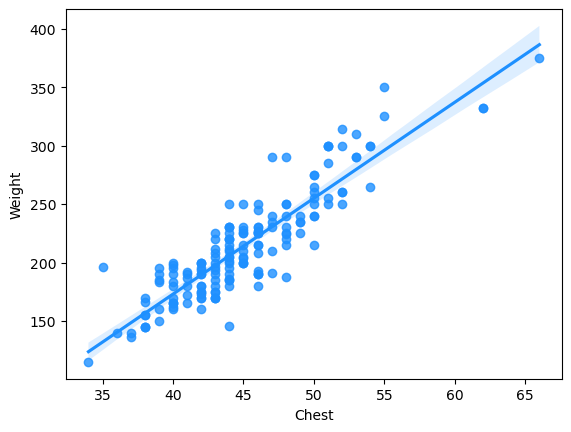

In [55]:
ax = sns.regplot(df2, x='Chest', y='Weight', color='dodgerblue')

*j.	What is the standard deviation of the residuals. Interpret.*

In [81]:
print("Stdev of residuals:", RMSE.round(2))

Stdev of residuals: 26.9


The standard deviation of the residuals is 26.9. This represents the variability around the regression line for the residuals. I would interpret 26.9 to be a fairly large standard deviation in this scenario when talking about a person's weight, which probably means that there are other factors that need to be considered to get a more accurate prediction. 

*k.	What is R-squared? Interpret.*

In [82]:
print("R-squared:", results.rsquared.round(2))

R-squared: 0.74


An R-squared value of .74 means that 74% of the variance in weight can be explained by chest size, providing strong evidence of a relationship. Although, 26% of the variance is unexplained, by chest size, and we would need to consider more variables to get a more accurate prediction.